<h1><center><b>LGMVIP - Data Science</b></center></h1>
<h2><center><b>Task 7 - Develop A Neural Network That Can Read Handwriting (Advanced Level)</b></center></h2>
<h3><center><b>Author : Akshay Paunikar</b></center></h3>

In [43]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [44]:
# Load the data from tensorflow
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [45]:
# Check the dimensions of the data
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

X_train : (60000, 28, 28)
X_test : (10000, 28, 28)
y_train : (60000,)
y_test : (10000,)


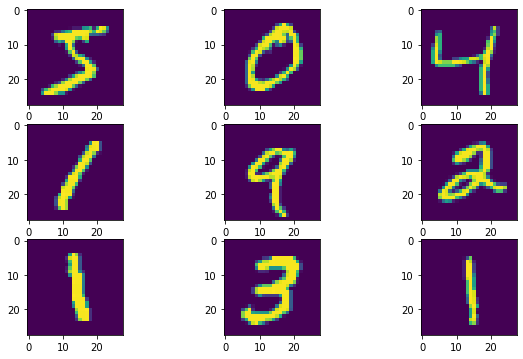

In [46]:
# plot some images from the data
plt.figure(figsize=(10,6))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
plt.show()

In [47]:
# reshape the dataset to have single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [48]:
# One hot encode target variable
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [49]:
# Convert from integers to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [50]:
# Normalize to range 0 - 1
X_train = X_train/255
X_test = X_test/255

<h4><b>Create CNN Model :</b></h4>

In [51]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [52]:
# Create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [53]:
# Check model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [54]:
# fit data
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1648 - accuracy: 0.9507 - val_loss: 0.0534 - val_accuracy: 0.9826
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0419 - val_accuracy: 0.9864
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0312 - accuracy: 0.9898 - val_loss: 0.0343 - val_accuracy: 0.9889
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.0305 - val_accuracy: 0.9904
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0277 - val_accuracy: 0.9909
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0289 - val_accuracy: 0.9915
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0116 - accuracy: 0.9958 - val_loss: 0.0256 - val_accuracy: 0.9926
Epoch 

In [55]:
# model evaluation
predictions = model.evaluate(X_test, y_test, verbose=1)
print("Validation Loss :", predictions[0])
print("Validation Accuracy :", predictions[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9923
Validation Loss : 0.03818300738930702
Validation Accuracy : 0.9922999739646912


In [56]:
# List all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

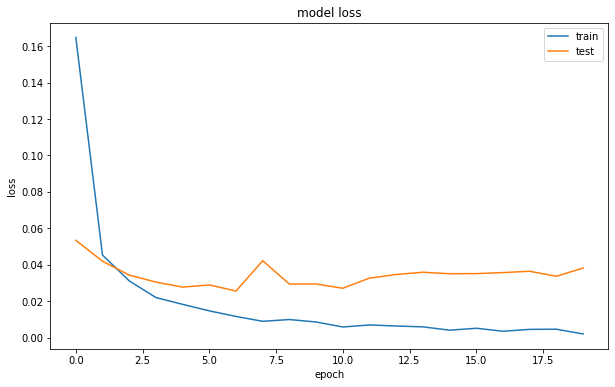

In [57]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

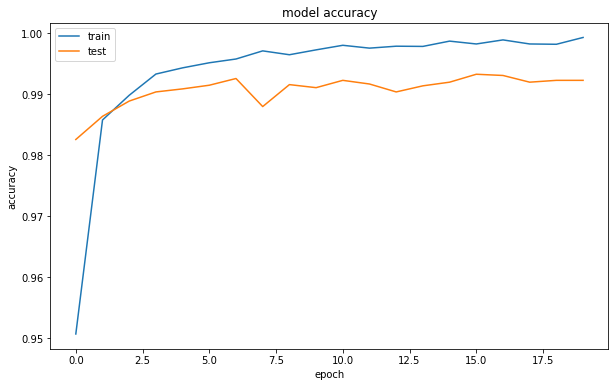

In [58]:
# Plot the Accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
# make predictions on the test data
pred = model.predict(X_test)

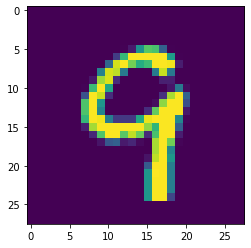

Actual Value : 9
Predicted Value : 9


In [62]:
# Test the model
plt.imshow(image.array_to_img(X_test[150]))
plt.show()

# check the y_test value
print("Actual Value :", np.argmax(y_test[150]))

# check the predicted value
print("Predicted Value :", np.argmax(pred[150]))